In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random

In [3]:
#1
# Load the data using the delimiter
file_path = 'person_knows_person.csv'
data = pd.read_csv(file_path, delimiter='|')

In [4]:
data.head()

,Person.id,Person.id.1
0,38,956
1,38,962
2,38,941
3,38,74
4,38,36


In [10]:
data.columns

Index(['Person.id', 'Person.id.1'], dtype='object')

In [14]:
#2.Dijkstra and A* to find the shortest path in the graph. Since the graph is large, you can create a smaller file and work on the smaller graph.
# Create a graph from the sampled data (sampling about 10% of the edges)
G = nx.from_pandas_edgelist(data, source='Person.id', target='Person.id.1')

# Sample a subgraph with 500 nodes to make computation more manageable
# Convert G.nodes() to a list before sampling
sub_nodes = random.sample(list(G.nodes()), min(500, len(G.nodes())))
subG = G.subgraph(sub_nodes).copy()

In [15]:
# Manually gather graph information
num_nodes = subG.number_of_nodes()
num_edges = subG.number_of_edges()

print(f"Graph with {num_nodes} nodes and {num_edges} edges")

Graph with 500 nodes and 4042 edges


In [17]:
def find_path(G, method='dijkstra'):
    """Attempt to find a path between two random nodes using the specified method ('dijkstra' or 'astar')."""
    attempts = 0
    while attempts < 10:
        source_node = random.choice(list(G.nodes()))
        target_node = random.choice(list(G.nodes()))
        try:
            if method == 'dijkstra':
                path = nx.dijkstra_path(G, source=source_node, target=target_node)
            elif method == 'astar':
                path = nx.astar_path(G, source=source_node, target=target_node)
            print(f"{method.capitalize()} path from node {source_node} to node {target_node}: {path}")
            return path
        except nx.NetworkXNoPath:
            print(f"No {method} path exists from node {source_node} to node {target_node}, trying again...")
            attempts += 1
    print(f"Failed to find a {method} path after {attempts} attempts.")
    return None

In [18]:
# Use the function to find paths
subG_largest = max(nx.connected_components(subG), key=len)  # Consider the largest connected component
subG_largest = subG.subgraph(subG_largest).copy()  # Work on the largest connected component

dijkstra_path = find_path(subG_largest, 'dijkstra')
astar_path = find_path(subG_largest, 'astar')

Dijkstra path from node 844 to node 571: [844, 131, 571]
Astar path from node 240 to node 240: [240]


In [19]:
#3.Prim and Kruskal to find the MST and remove other edges
# MST with Prim's algorithm
mst_prim = nx.minimum_spanning_tree(subG_largest, algorithm='prim')
print("MST (Prim's) has", mst_prim.number_of_edges(), "edges")

# MST with Kruskal's algorithm
mst_kruskal = nx.minimum_spanning_tree(subG_largest, algorithm='kruskal')
print("MST (Kruskal's) has", mst_kruskal.number_of_edges(), "edges")

MST (Prim's) has 454 edges
MST (Kruskal's) has 454 edges


In [20]:
#4. Page rank and HITS algorithm to order the graph nodes based on their importance. Again, if the graph is too large for your system, you can make a smaller file and use a subgraph.
pagerank_scores = nx.pagerank(subG_largest)
hubs, authorities = nx.hits(subG_largest)

In [23]:
#5. Visualize the result of PageRank and HITS algorithm (6 points). Higher-ranked nodes should have denser colors, and lower ranks nodes should have lighter color. 
# Normalize the PageRank and Authority scores for better visualization effects
max_pr = max(pagerank_scores.values())
min_pr = min(pagerank_scores.values())
normalized_pr = {node: (score - min_pr) / (max_pr - min_pr) for node, score in pagerank_scores.items()}

max_auth = max(authorities.values())
min_auth = min(authorities.values())
normalized_auth = {node: (score - min_auth) / (max_auth - min_auth) for node, score in authorities.items()}

# Setup the plot
plt.figure(figsize=(16, 8))
pos = nx.spring_layout(subG_largest, seed=42)  # For consistent layout between the two plots


<Figure size 1600x800 with 0 Axes>

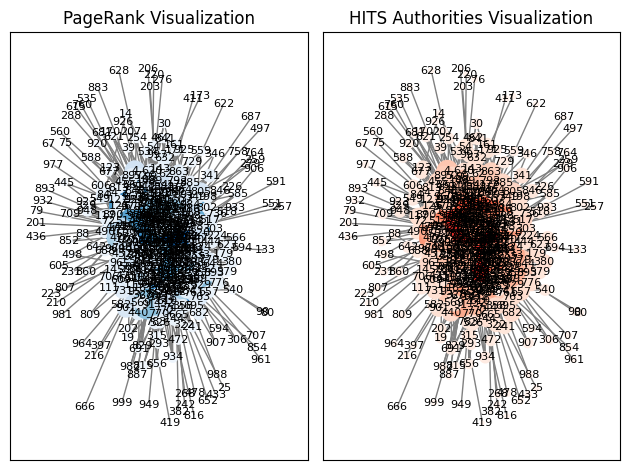

In [24]:
# PageRank Visualization
plt.subplot(121)
pagerank_sizes = [normalized_pr[node] * 1000 for node in subG_largest]  # Node sizes proportional to normalized PageRank
pagerank_colors = [normalized_pr[node] for node in subG_largest]  # Node colors also proportional to normalized PageRank
nx.draw_networkx(subG_largest, pos, node_size=pagerank_sizes, node_color=pagerank_colors, cmap=plt.cm.Blues,
                 font_size=8, font_color='black', with_labels=True, edge_color='gray')
plt.title('PageRank Visualization')

# HITS Authorities Visualization
plt.subplot(122)
authority_sizes = [normalized_auth[node] * 1000 for node in subG_largest]  # Node sizes proportional to normalized Authorities
authority_colors = [normalized_auth[node] for node in subG_largest]  # Node colors also proportional to normalized Authorities
nx.draw_networkx(subG_largest, pos, node_size=authority_sizes, node_color=authority_colors, cmap=plt.cm.Reds,
                 font_size=8, font_color='black', with_labels=True, edge_color='gray')
plt.title('HITS Authorities Visualization')

plt.tight_layout()
plt.show()